In [1]:
import os
import csv
import sys
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.set_cmap("viridis")
font = {'size'   : 15}

matplotlib.rc('font', **font)
markersize = 10

<Figure size 640x480 with 0 Axes>

In [3]:
algorithms = ['MIS-Luby', 'MIS-SW08', 'MIS-GP22', 'MIS-GP22-0.1', 'MIS-GP22-0.5', 'MIS-Lam']
result_dir = "results_mis"
n_tests = 50

In [4]:
failed = {algorithm : [] for algorithm in algorithms}

In [5]:
list_n = list(range(200, 2001, 200))

In [6]:
all_n_active_rounds = {algorithm : {k:0 for k in list_n} for algorithm in algorithms}
all_n_average_awake_rounds = {algorithm : {k:0 for k in list_n} for algorithm in algorithms}
all_finished_round_rounds = {algorithm : {k:0 for k in list_n} for algorithm in algorithms}
all_n_worst_case_awake_rounds = {algorithm : {k:0 for k in list_n} for algorithm in algorithms}

for algorithm in algorithms:
    for n in list_n:
        for denseness in ["sparse"]:
            n_success = 0
            for i in range(n_tests):
                result_file = f"{result_dir}/{n}/{denseness}/{algorithm}_{i:03d}.txt"
                if not os.path.isfile(result_file):
                    print(f"Algorithm {algorithm} failed at input {result_file}!")
                    failed[algorithm].append(result_file)
                    continue
                with open(result_file, "r") as f:
                    b = f.readlines()
                    b = list(map(lambda x : x.strip("\r\n"), b))
                    a = b[1]
                    check_result = int(b[-1][-1])
                    if check_result == 0:
                        print(f"Algorithm {algorithm} failed at input {result_file}!")
                        failed[algorithm].append(result_file)
                        continue
                    (n1,
                     n_selected_nodes,
                     total_awake_rounds,
                     average_awake_rounds,
                     max_awake_rounds,
                     finished_round,
                     n_idle_rounds,
                     n_active_rounds) = map(float, a.split())
                    #print(average_awake_rounds, n_active_rounds)
                    
                    all_n_active_rounds[algorithm][n] += n_active_rounds
                    all_n_worst_case_awake_rounds[algorithm][n] += max_awake_rounds
                    all_finished_round_rounds[algorithm][n] = max(
                        all_finished_round_rounds[algorithm][n], finished_round)
                    
                    if algorithm not in ['MIS-Luby', 'MIS-SW08']:
                        all_n_average_awake_rounds[algorithm][n] += average_awake_rounds
                    else:
                        all_n_average_awake_rounds[algorithm][n] += n_active_rounds
                    
                    n_success += 1
                        
            all_n_active_rounds[algorithm][n] /= n_success
            all_n_average_awake_rounds[algorithm][n] /= n_success
            all_n_worst_case_awake_rounds[algorithm][n] /= n_success
            
            all_n_active_rounds[algorithm][n] = np.round(all_n_active_rounds[algorithm][n], 2)
            all_n_average_awake_rounds[algorithm][n] = np.round(all_n_average_awake_rounds[algorithm][n], 2)
            all_n_worst_case_awake_rounds[algorithm][n] = np.round(all_n_worst_case_awake_rounds[algorithm][n], 2)

Algorithm MIS-Luby failed at input results_mis/1000/sparse/MIS-Luby_004.txt!
Algorithm MIS-Luby failed at input results_mis/1000/sparse/MIS-Luby_014.txt!
Algorithm MIS-Luby failed at input results_mis/1000/sparse/MIS-Luby_016.txt!
Algorithm MIS-Luby failed at input results_mis/1000/sparse/MIS-Luby_026.txt!
Algorithm MIS-Luby failed at input results_mis/1200/sparse/MIS-Luby_046.txt!
Algorithm MIS-Luby failed at input results_mis/1800/sparse/MIS-Luby_015.txt!
Algorithm MIS-Luby failed at input results_mis/1800/sparse/MIS-Luby_043.txt!
Algorithm MIS-Luby failed at input results_mis/2000/sparse/MIS-Luby_014.txt!
Algorithm MIS-Luby failed at input results_mis/2000/sparse/MIS-Luby_037.txt!
Algorithm MIS-Luby failed at input results_mis/2000/sparse/MIS-Luby_044.txt!
Algorithm MIS-GP22-0.1 failed at input results_mis/1400/sparse/MIS-GP22-0.1_007.txt!
Algorithm MIS-GP22-0.1 failed at input results_mis/1400/sparse/MIS-GP22-0.1_019.txt!
Algorithm MIS-GP22-0.1 failed at input results_mis/1600/spar

In [7]:
pprint(all_n_active_rounds)

{'MIS-GP22': {200: 17.76,
              400: 18.1,
              600: 19.86,
              800: 22.92,
              1000: 24.18,
              1200: 24.28,
              1400: 24.54,
              1600: 25.3,
              1800: 24.94,
              2000: 25.74},
 'MIS-GP22-0.1': {200: 17.42,
                  400: 20.96,
                  600: 22.92,
                  800: 25.1,
                  1000: 24.36,
                  1200: 26.38,
                  1400: 27.75,
                  1600: 29.18,
                  1800: 29.44,
                  2000: 29.26},
 'MIS-GP22-0.5': {200: 17.38,
                  400: 20.04,
                  600: 22.82,
                  800: 24.42,
                  1000: 25.18,
                  1200: 25.14,
                  1400: 25.06,
                  1600: 27.47,
                  1800: 27.76,
                  2000: 28.08},
 'MIS-Lam': {200: 18.96,
             400: 21.26,
             600: 23.1,
             800: 23.08,
             1000: 24.8

In [8]:
pprint(all_n_average_awake_rounds)

{'MIS-GP22': {200: 4.11,
              400: 4.28,
              600: 4.48,
              800: 4.59,
              1000: 4.56,
              1200: 4.7,
              1400: 4.67,
              1600: 4.67,
              1800: 4.7,
              2000: 4.73},
 'MIS-GP22-0.1': {200: 6.98,
                  400: 7.11,
                  600: 7.46,
                  800: 7.58,
                  1000: 7.64,
                  1200: 7.81,
                  1400: 7.87,
                  1600: 7.93,
                  1800: 8.03,
                  2000: 8.09},
 'MIS-GP22-0.5': {200: 5.29,
                  400: 5.48,
                  600: 5.74,
                  800: 5.88,
                  1000: 5.9,
                  1200: 6.04,
                  1400: 5.97,
                  1600: 6.0,
                  1800: 6.07,
                  2000: 6.16},
 'MIS-Lam': {200: 9.66,
             400: 9.64,
             600: 9.53,
             800: 9.61,
             1000: 9.65,
             1200: 9.78,
       

In [9]:
pprint(all_n_worst_case_awake_rounds)

{'MIS-GP22': {200: 14.98,
              400: 15.34,
              600: 16.68,
              800: 19.62,
              1000: 20.8,
              1200: 20.98,
              1400: 21.12,
              1600: 21.88,
              1800: 21.34,
              2000: 22.04},
 'MIS-GP22-0.1': {200: 16.18,
                  400: 19.66,
                  600: 21.7,
                  800: 23.76,
                  1000: 22.86,
                  1200: 25.0,
                  1400: 26.29,
                  1600: 27.78,
                  1800: 27.78,
                  2000: 27.56},
 'MIS-GP22-0.5': {200: 15.2,
                  400: 17.78,
                  600: 20.54,
                  800: 21.94,
                  1000: 22.65,
                  1200: 22.74,
                  1400: 22.48,
                  1600: 24.9,
                  1800: 25.06,
                  2000: 25.17},
 'MIS-Lam': {200: 15.36,
             400: 16.64,
             600: 17.88,
             800: 17.94,
             1000: 19.38

In [10]:
pprint(all_finished_round_rounds)

{'MIS-GP22': {200: 30.0,
              400: 31.0,
              600: 32.0,
              800: 35.0,
              1000: 38.0,
              1200: 38.0,
              1400: 39.0,
              1600: 41.0,
              1800: 47.0,
              2000: 41.0},
 'MIS-GP22-0.1': {200: 34.0,
                  400: 35.0,
                  600: 36.0,
                  800: 42.0,
                  1000: 40.0,
                  1200: 43.0,
                  1400: 47.0,
                  1600: 47.0,
                  1800: 47.0,
                  2000: 47.0},
 'MIS-GP22-0.5': {200: 28.0,
                  400: 37.0,
                  600: 36.0,
                  800: 38.0,
                  1000: 42.0,
                  1200: 43.0,
                  1400: 41.0,
                  1600: 45.0,
                  1800: 45.0,
                  2000: 45.0},
 'MIS-Lam': {200: 38.0,
             400: 38.0,
             600: 40.0,
             800: 39.0,
             1000: 42.0,
             1200: 41.0,
   

In [11]:
df_average_awake = pd.DataFrame(all_n_average_awake_rounds)
df_average_awake.to_csv("stat/mis_average_awake.csv")
df_average_awake

,MIS-Luby,MIS-SW08,MIS-GP22,MIS-GP22-0.1,MIS-GP22-0.5,MIS-Lam
200,14.40,11.80,4.11,6.98,5.29,9.66
400,18.02,13.42,4.28,7.11,5.48,9.64
600,18.82,14.94,4.48,7.46,5.74,9.53
800,18.56,15.18,4.59,7.58,5.88,9.61
1000,21.50,15.72,4.56,7.64,5.90,9.65
1200,22.71,15.32,4.70,7.81,6.04,9.78
1400,23.80,15.20,4.67,7.87,5.97,9.77
1600,24.72,15.70,4.67,7.93,6.00,9.80
1800,24.58,16.30,4.70,8.03,6.07,9.77
2000,22.85,16.08,4.73,8.09,6.16,9.85


In [12]:
df_worst_case_awake = pd.DataFrame(all_n_worst_case_awake_rounds)
df_worst_case_awake.to_csv("stat/mis_worst_case_awake.csv")
df_worst_case_awake

,MIS-Luby,MIS-SW08,MIS-GP22,MIS-GP22-0.1,MIS-GP22-0.5,MIS-Lam
200,14.40,11.80,14.98,16.18,15.20,15.36
400,18.02,13.42,15.34,19.66,17.78,16.64
600,18.82,14.94,16.68,21.70,20.54,17.88
800,18.56,15.18,19.62,23.76,21.94,17.94
1000,21.50,15.72,20.80,22.86,22.65,19.38
1200,22.71,15.32,20.98,25.00,22.74,20.14
1400,23.80,15.20,21.12,26.29,22.48,20.60
1600,24.72,15.70,21.88,27.78,24.90,20.40
1800,24.58,16.30,21.34,27.78,25.06,20.56
2000,22.85,16.08,22.04,27.56,25.17,21.92


In [13]:
df_active_rounds = pd.DataFrame(all_n_active_rounds)
df_active_rounds.to_csv("stat/mis_active_rounds.csv")
df_active_rounds

,MIS-Luby,MIS-SW08,MIS-GP22,MIS-GP22-0.1,MIS-GP22-0.5,MIS-Lam
200,14.40,11.80,17.76,17.42,17.38,18.96
400,18.02,13.42,18.10,20.96,20.04,21.26
600,18.82,14.94,19.86,22.92,22.82,23.10
800,18.56,15.18,22.92,25.10,24.42,23.08
1000,21.50,15.72,24.18,24.36,25.18,24.88
1200,22.71,15.32,24.28,26.38,25.14,25.62
1400,23.80,15.20,24.54,27.75,25.06,26.22
1600,24.72,15.70,25.30,29.18,27.47,26.38
1800,24.58,16.30,24.94,29.44,27.76,26.42
2000,22.85,16.08,25.74,29.26,28.08,27.92


In [14]:
def plot_df(
    df,
    title=None,
    y_title=-0.2,
    figsize=(30,10),
    markersize=10,
    bbox_to_anchor=(0.5, 0, 0.4, 0.5),
    y_ticks=None,
    y_label=""
):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    r = df.index.values
    ax.plot(r, df["MIS-GP22"].values, marker='v', markersize=markersize, label="MIS-GP22-1")
    ax.plot(r, df["MIS-GP22-0.1"].values, marker='D', markersize=markersize, label="MIS-GP22-0.1")
    ax.plot(r, df["MIS-GP22-0.5"].values, marker='o', markersize=markersize, label="MIS-GP22-0.5")
    ax.plot(r, df["MIS-Lam"].values, marker='x', markersize=markersize, label="SMIS")
    
    ax.set_yticks(y_ticks)
    ax.set_ylabel(y_label)
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
    ax.set_xticks(r)
    ax.set_xlabel("Number of nodes")
    if title is not None: ax.set_title(title, y=y_title)
    handles, labels = ax.get_legend_handles_labels()
    #fig.legend(handles, labels, bbox_to_anchor=(0.6, 1.0), ncol=4)
    fig.legend(handles, labels, bbox_to_anchor=bbox_to_anchor)
    plt.grid()
    return ax

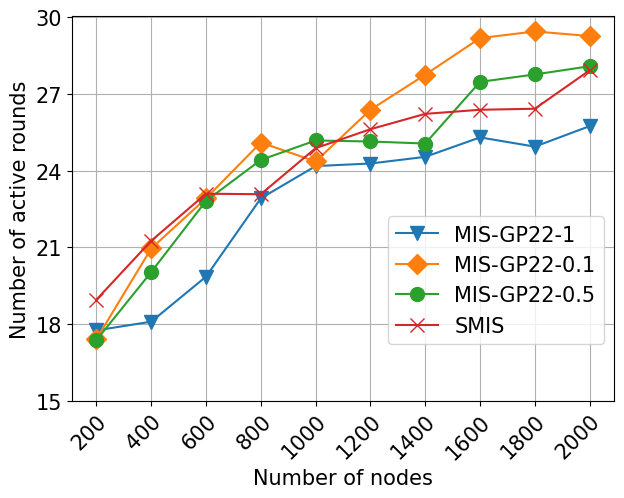

In [15]:
plot_df(df_active_rounds, figsize=(7,5), bbox_to_anchor=(0.5, 0, 0.4, 0.5), y_ticks=[15, 18, 21, 24, 27, 30],
        y_label="Number of active rounds")
plt.savefig("stat/mis_active_rounds.pdf", bbox_inches="tight")

In [16]:
def plot_df_1(
    df,
    title=None,
    y_title=-0.2,
    figsize=(30,10),
    markersize=10,
    bbox_to_anchor=(0.5, 0, 0.4, 0.5),
    y_ticks=None,
    y_label=""
):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    r = df.index.values
    ax.plot(r, df["MIS-GP22"].values, marker='v', markersize=markersize, label="MIS-GP22")
    ax.plot(r, df["MIS-Luby"].values, marker='D', markersize=markersize, label="MIS-Luby")
    ax.plot(r, df["MIS-SW08"].values, marker='o', markersize=markersize, label="MIS-SW08")
    ax.plot(r, df["MIS-Lam"].values, marker='x', markersize=markersize, label="SMIS")
    
    ax.set_yticks(y_ticks)
    ax.set_ylabel(y_label)
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
    ax.set_xticks(r)
    ax.set_xlabel("Number of nodes")
    if title is not None: ax.set_title(title, y=y_title)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=bbox_to_anchor, ncol=2)
    #fig.legend(handles, labels, bbox_to_anchor=bbox_to_anchor)
    plt.grid()
    return ax

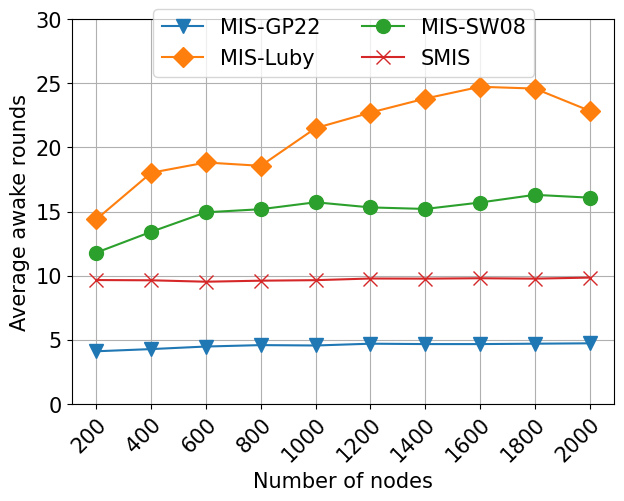

In [40]:
plot_df_1(df_average_awake, figsize=(7,5), bbox_to_anchor=(0.4, 0, 0.4, 0.92), y_ticks=np.arange(0,31,5),
          y_label="Average awake rounds")
plt.savefig("stat/mis_average_awake.pdf", bbox_inches="tight")

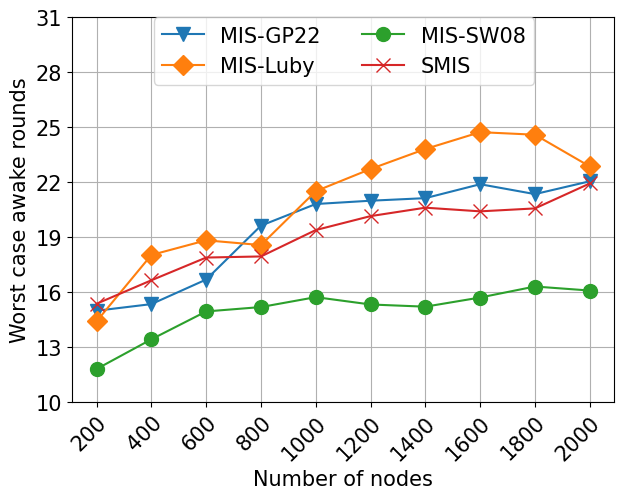

In [42]:
plot_df_1(df_worst_case_awake, figsize=(7,5), bbox_to_anchor=(0.4, 0, 0.4, 0.90), y_ticks=np.arange(10,32,3),
          y_label="Worst case awake rounds")
plt.savefig("stat/mis_worst_case_awake.pdf", bbox_inches="tight")